<a href="https://colab.research.google.com/github/AdrianGabryla/MachineLearning/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import random
import matplotlib.pyplot as plt

def unit_step(v):
    return 1 if v >= 0 else 0

def perceptron_model(x, w, b):
    v = np.dot(w, x) + b
    return unit_step(v)

def decision_boundary(x, weights, bias):
    return -(weights[0] / weights[1]) * x - (bias / weights[1])

In [15]:
augmented_X = [
    [0, 0, 0],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
]

weights = np.array([random.random(), random.random()])
bias = random.random()
lr = 0.1
epochs = 20

In [16]:
for epoch in range(epochs):
    error_sum = 0
    for row in augmented_X:
        x = np.array(row[:-1])
        target = row[-1]

        y = perceptron_model(x, weights, bias)
        error = target - y
        error_sum += abs(error)

        weights += lr * error * x
        bias += lr * error

    if epoch % 2 == 0:
        print(f"Epoch {epoch}: Error {error_sum}")

Epoch 0: Error 1
Epoch 2: Error 1
Epoch 4: Error 0
Epoch 6: Error 0
Epoch 8: Error 0
Epoch 10: Error 0
Epoch 12: Error 0
Epoch 14: Error 0
Epoch 16: Error 0
Epoch 18: Error 0


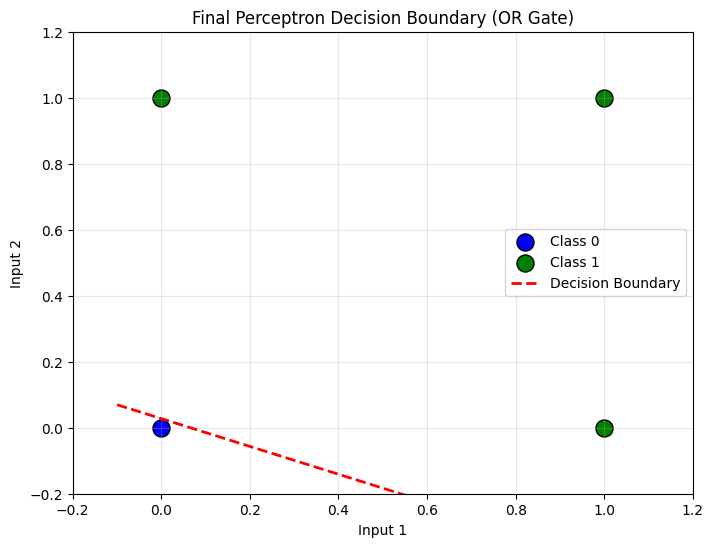

In [17]:
x_interval = np.linspace(-0.1, 1.1, 150)
y_line = decision_boundary(x_interval, weights, bias)

X_points = np.array([item[:-1] for item in augmented_X])
y_true = np.array([item[-1] for item in augmented_X])

plt.figure(figsize=(8, 6))

for i in range(len(X_points)):
    if y_true[i] == 0:
        plt.scatter(X_points[i][0], X_points[i][1], color="blue", s=150, edgecolors='k', label="Class 0" if i == 0 else "")
    else:
        plt.scatter(X_points[i][0], X_points[i][1], color="green", s=150, edgecolors='k', label="Class 1" if i == 1 else "")

plt.plot(x_interval, y_line, 'r--', linewidth=2, label="Decision Boundary")

plt.ylim(-0.2, 1.2)
plt.xlim(-0.2, 1.2)
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("Final Perceptron Decision Boundary (OR Gate)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()